#  <span style="color:red">Bike Sharing Assignment - MLR (Balanced Approach)<span>

**Company Brief:**
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

**Probelm Statement:** 
BoomBikes want to understand the factors that affects the demand of shared bikes (in America).
Thus company wants to :
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Analysis Approach:**
As part of multiple linear regression model, we will be performing below steps:
1. Read, Understand and Visualize the data
2. Preparing the data for model (create dummy variable, train-test set, rescaling)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set
6. Automated Approach - Model Selection
7. Conclusion

##  <span style="color:red">Step1: Read, Understanding the data</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split #To Split the dataset into train and test set
from sklearn.preprocessing import MinMaxScaler #To scale the variables 
from sklearn.feature_selection import RFE # To perform automated approach
from sklearn.linear_model import LinearRegression # Create a linear regression
from sklearn.metrics import r2_score # to calculate r2 scores

import statsmodels.api as sm # to add constant 
from statsmodels.stats.outliers_influence import variance_inflation_factor # to calcuate VIF
warnings.filterwarnings('ignore')

In [2]:
bikesharing = pd.read_csv(r'C:\Users\chida\OneDrive\Documents\IIITB-AI&ML\Course-4\Module2-LinearRegressionAssignment\day.csv');
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikesharing.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [5]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###  <span style="color:blue"> Below are the observations on the column<span>
1. **dteday**: date, which has already been segregated into month (column name: mnth), year (column name: yr). And Day in a month is presented as weekdays (which denote that day of the week for the given date). **No action required**.
2. **season** and **weathersit** : Need to convert the Categorical Variables by representing the values to actual season and need to perform **dummy variable creation**.
3. **weekday** and **mnth**: Quantative Ordal Variable, represents day of the week and month respectively. This can be also be inculded in **Dummy variable creation**.
4. **yr**, **holiday**, **workingday**, are Quantative Ordal Variable with two possible values i.e 0 and 1. **No action required**.
5. **temp** and **atemp** represents same quantative variable, i.e Temperature. **No action required**.
6. **hum** and **windspeed** represent a quantative variable. **No action required**.

<Figure size 3000x3000 with 0 Axes>

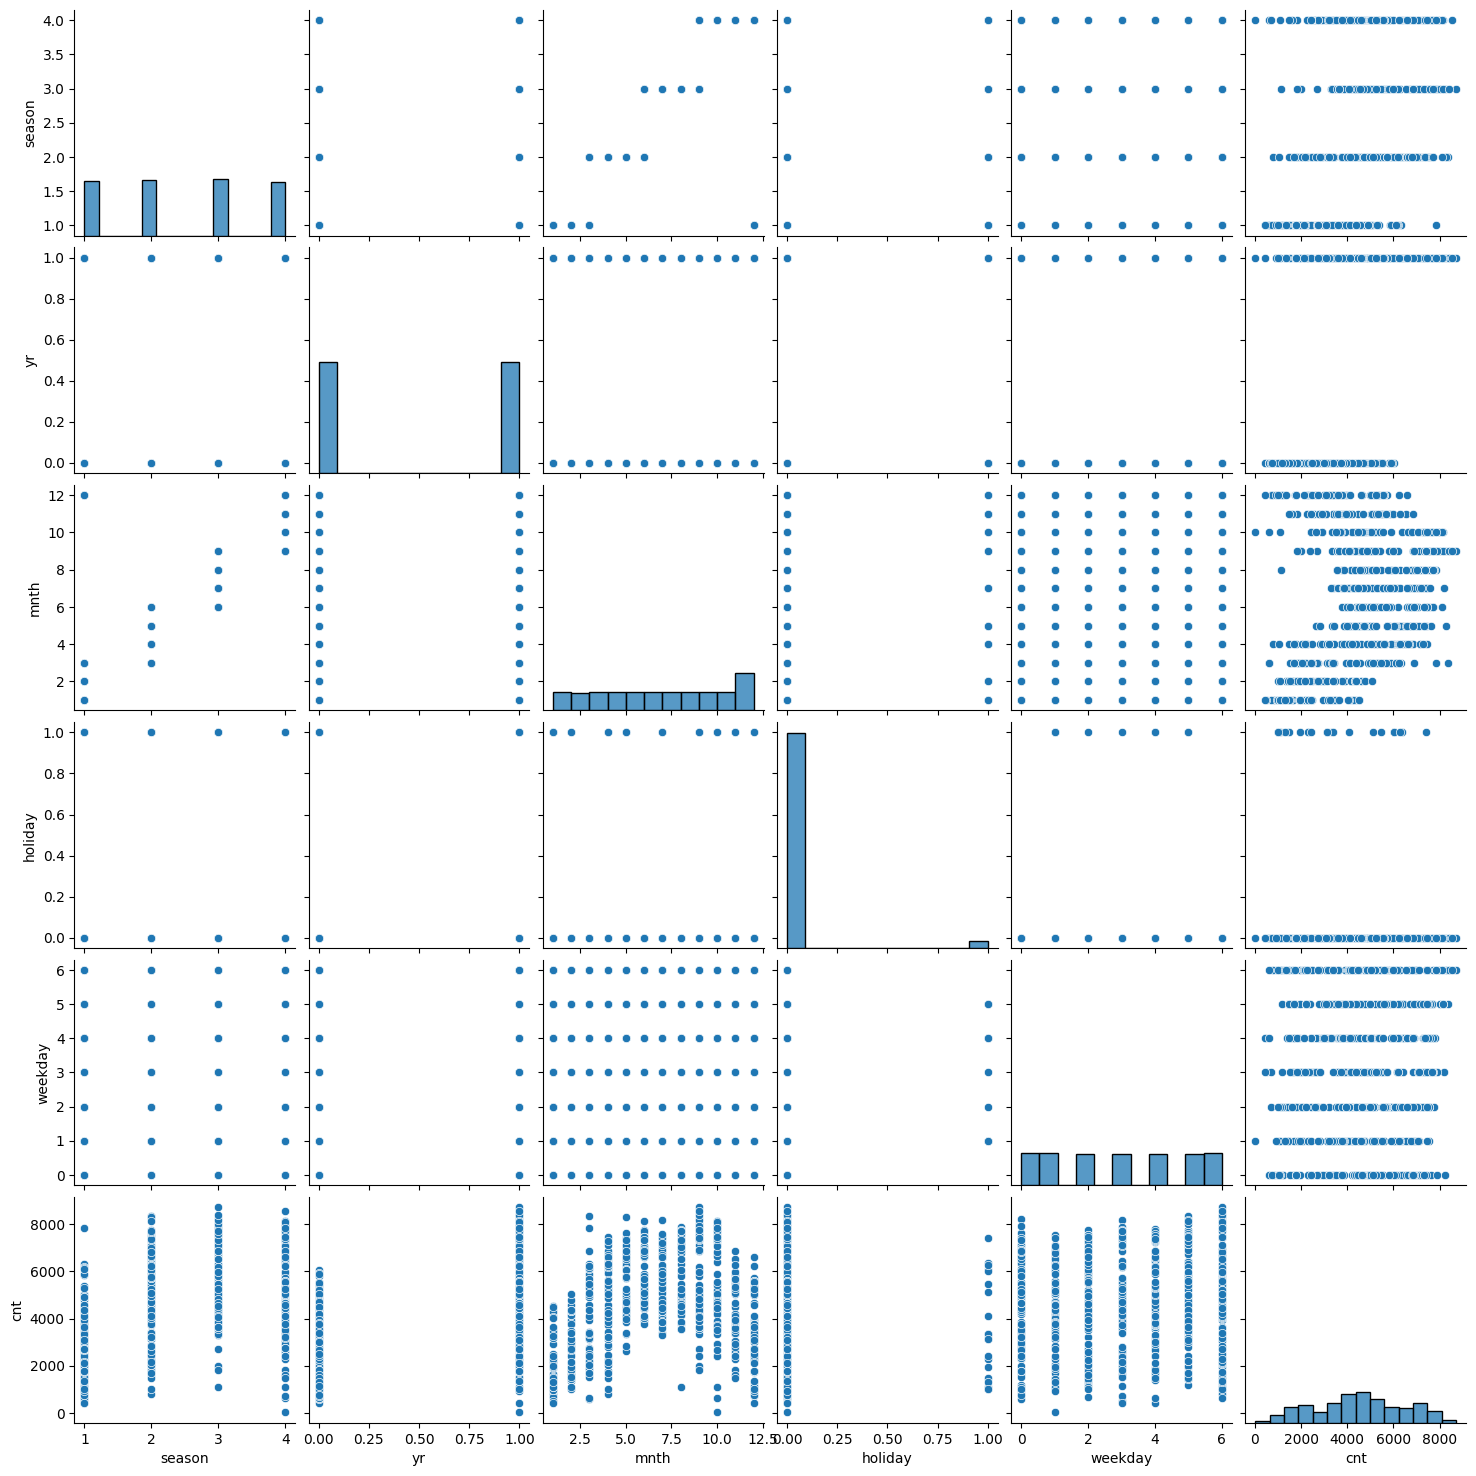

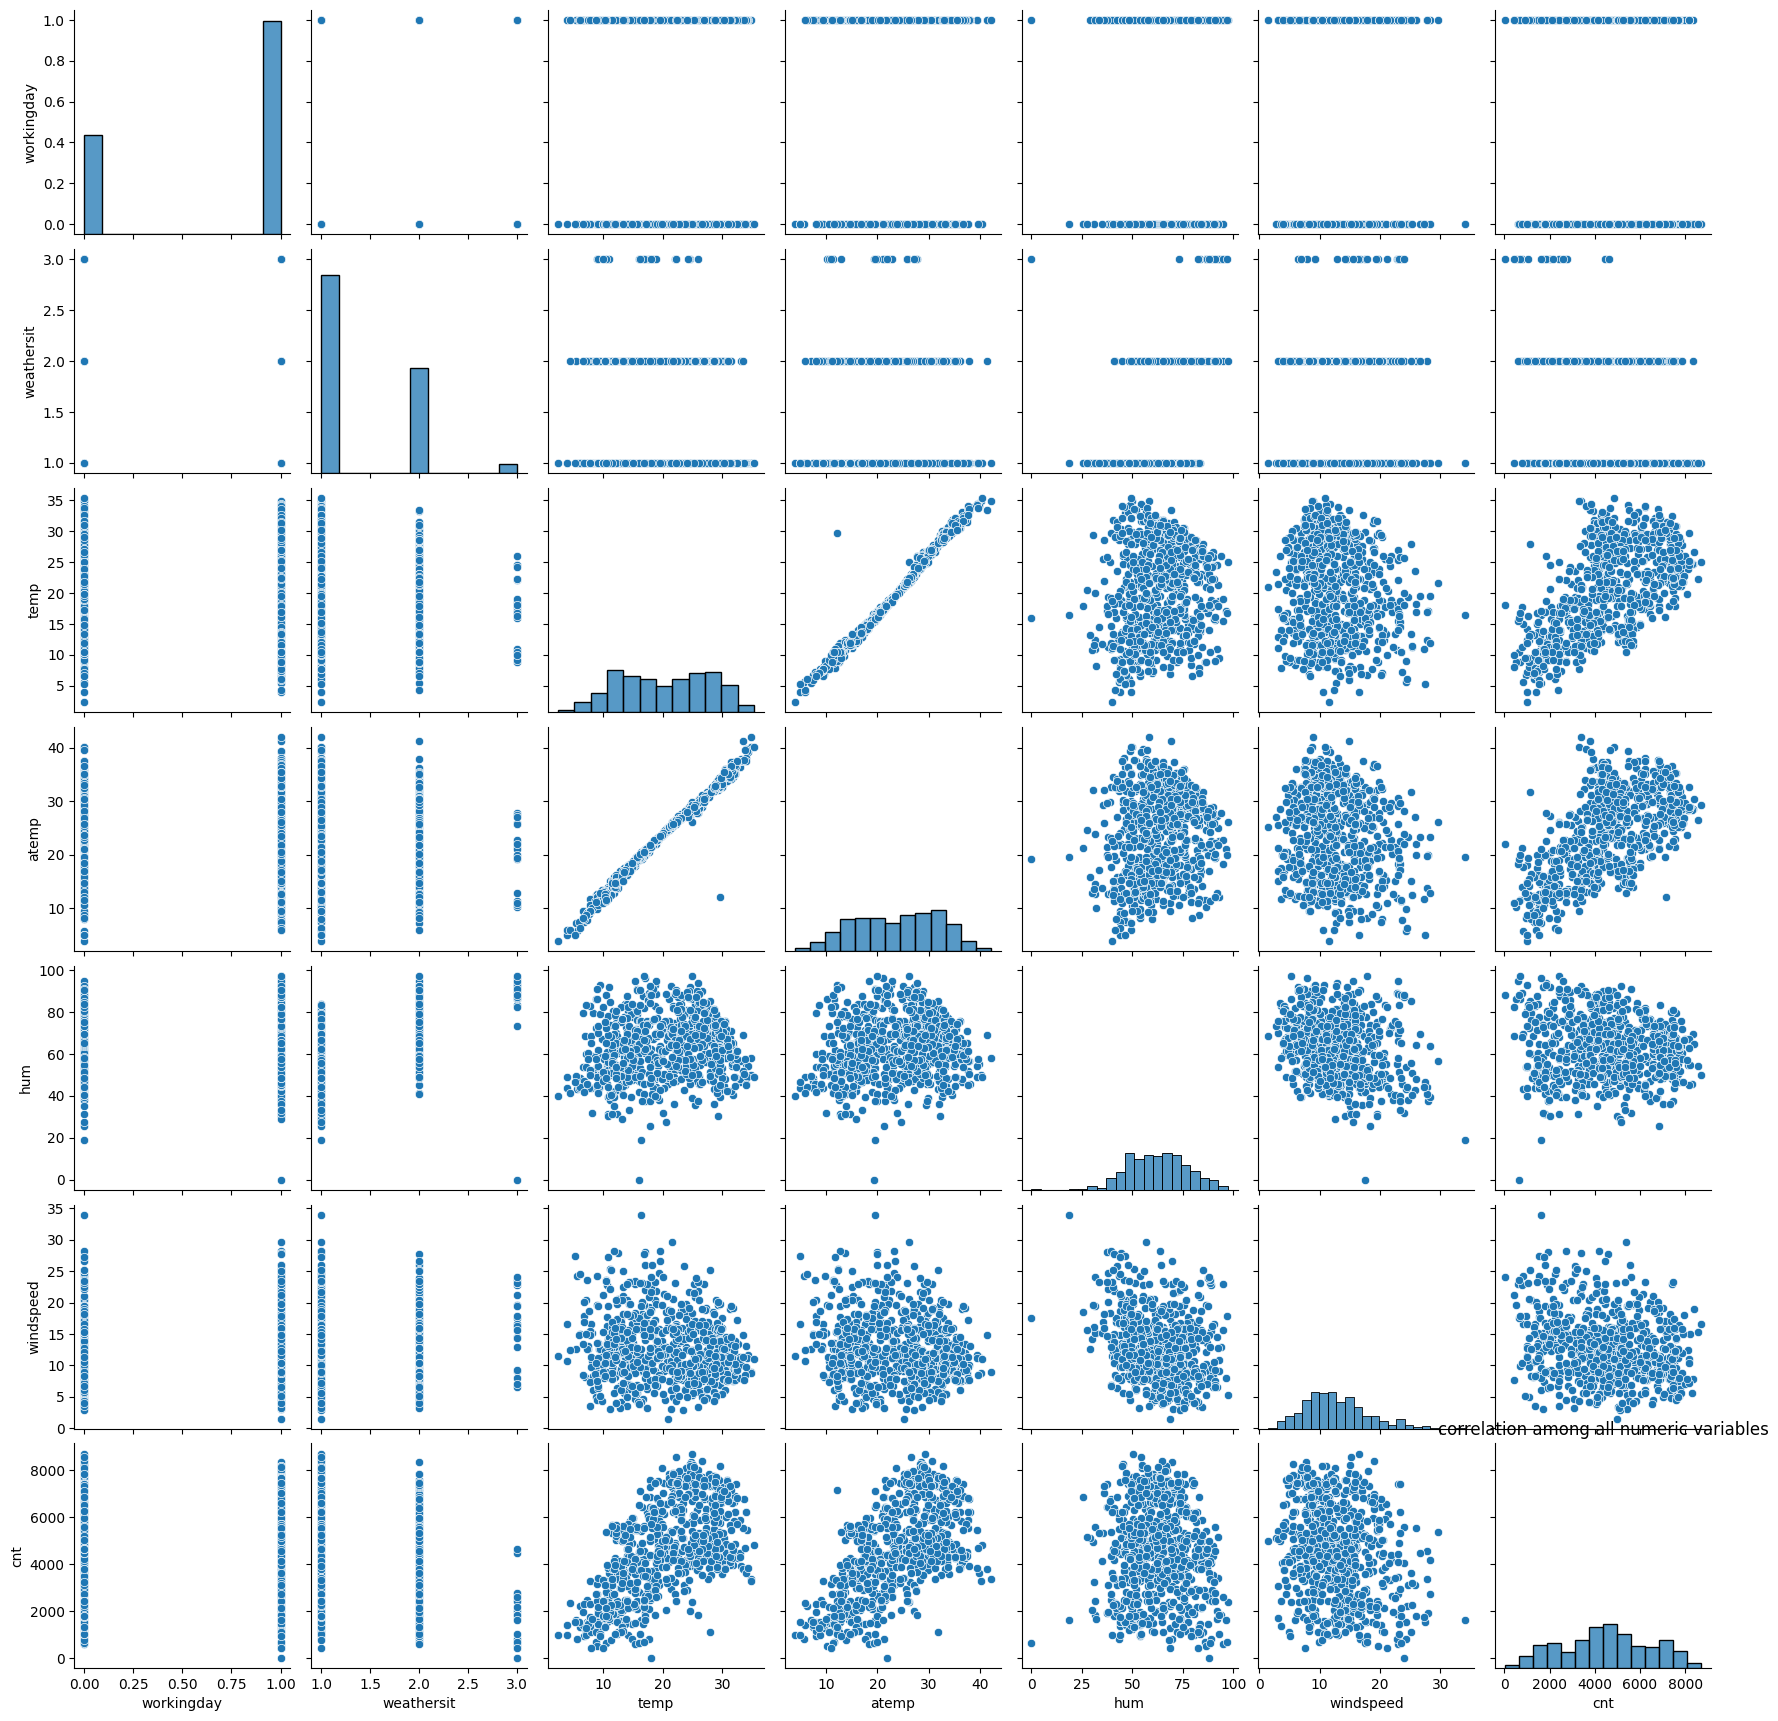

In [6]:
#1. correlation among all numeric variables
bikesharing_numeric_cols1 = ['season','yr','mnth','holiday','weekday','cnt']
bikesharing_numeric_cols2 = ['workingday','weathersit','temp','atemp','hum','windspeed','cnt']
plt.figure(figsize = (30, 30))
sns.pairplot(bikesharing[bikesharing_numeric_cols1])
sns.pairplot(bikesharing[bikesharing_numeric_cols2])
plt.title("correlation among all numeric variables")
plt.show()
# We should go with linear regression as some or alleast one of the variable i.e area has relationship with Price


In [7]:
bikesharing[bikesharing_numeric_cols1]

,season,yr,mnth,holiday,weekday,cnt
0,1,0,1,0,6,985
1,1,0,1,0,0,801
2,1,0,1,0,1,1349
3,1,0,1,0,2,1562
4,1,0,1,0,3,1600
...,...,...,...,...,...,...
725,1,1,12,0,4,2114
726,1,1,12,0,5,3095
727,1,1,12,0,6,1341
728,1,1,12,0,0,1796


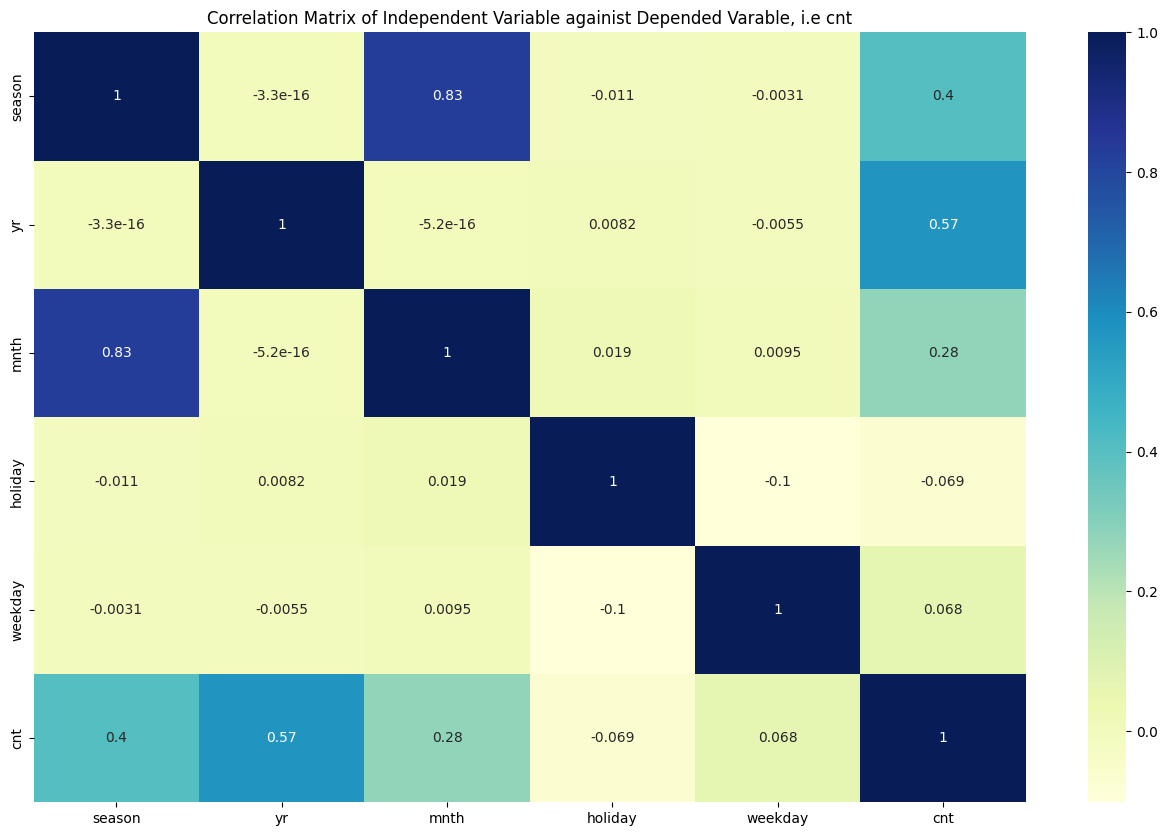

In [8]:
#correlation heatmap 
plt.figure(figsize = (16, 10))
sns.heatmap(bikesharing[bikesharing_numeric_cols1].corr(), annot = True , cmap="YlGnBu")
plt.title("Correlation Matrix of Independent Variable againist Depended Varable, i.e cnt")
plt.show()

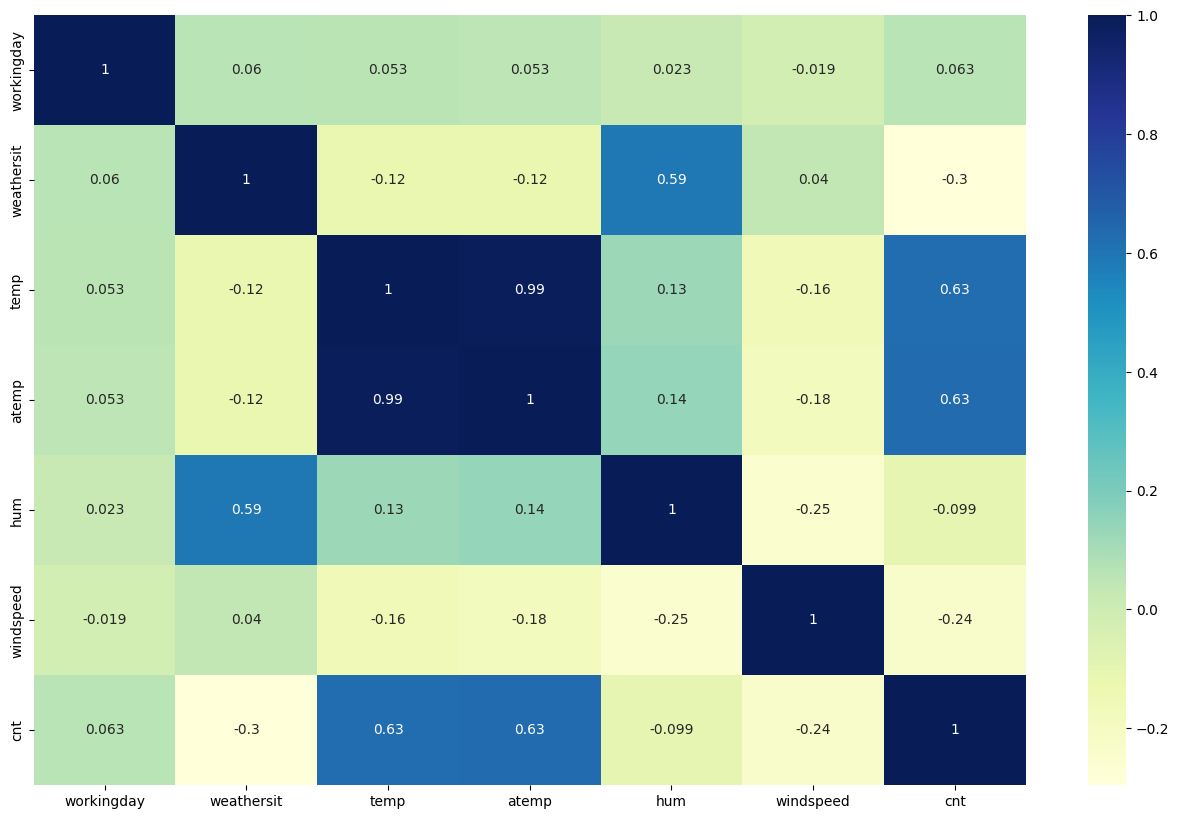

In [9]:
#correlation heatmap 
plt.figure(figsize = (16, 10))
sns.heatmap(bikesharing[bikesharing_numeric_cols2].corr(), annot = True , cmap="YlGnBu")
plt.show()

###  <span style="color:blue">Observation<span>
From above pairplot and heatmap, below are the observations against target varible **cnt**:
1. Hum and Windspeed has negative correlation and doesnt follow a straight line principle.
2. Holiday has negative relation where on holiday less number of booking are observed
3. Weathersit has negative relation
4. Working Day, atemp and temp has same correlation, i.e 0.63 and hence we need to perform **multicollinearity**
5. Followed by yr, season and mnth variable has positive correlation.

## <span style="color:red">Step2: Preparng the data for modelling<span>
1. Convert quantative non ordal variable to categorical variables on column **weathersit** and **season**
2. Create a dummy variable for categorical variables  that has more than 2 levels i.e **weathersit**, **season**, **weekday** and **mnth**
3. Train Test Split
4. Rescale

In [10]:
bikesharing['weathersit'].astype('int')

0      2
1      2
2      1
3      1
4      1
      ..
725    2
726    2
727    2
728    1
729    2
Name: weathersit, Length: 730, dtype: int64

In [11]:
# Convert weathersit quantative variable to categorical variable
bikesharing_1 = bikesharing
weather_mapping = {
    1: "Clear",
    2: "Mist",
    3: "LightSnow",
    4: "HeavyRain"
}

bikesharing_1['weathersit'] = bikesharing_1['weathersit'].map(weather_mapping)
bikesharing_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Convert season quantative variable to categorical variable
season_mapping = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}
bikesharing_1['season'] = bikesharing_1['season'].map(season_mapping)
bikesharing_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
bikesharing_1['weathersit'].value_counts()

weathersit
Clear        463
Mist         246
LightSnow     21
Name: count, dtype: int64

In [14]:
#Create dummy variables for weathersit and season
weathersit_dummy = pd.get_dummies(bikesharing_1['weathersit'], dtype='int')
weathersit_dummy.head()

,Clear,LightSnow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


From above dummy variable, note that HeavyRain is missing as we dont have any data point representing in the given dataset.
Hence no need to add drop_first in the above command and we can consume all dummy variable created.

Lets add the dummy varible to the dataset.

In [15]:
bikesharing_2 = pd.concat([bikesharing_1,weathersit_dummy],axis=1)
bikesharing_2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Clear,LightSnow,Mist
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [16]:
bikesharing_2 = bikesharing_2.drop('weathersit',axis=1)
bikesharing_2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Clear,LightSnow,Mist
0,1,01-01-2018,spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [17]:
#Lets drop instant and dteday
bikesharing_2 = bikesharing_2.drop(['instant','dteday'],axis=1)
bikesharing_2.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Clear,LightSnow,Mist
0,spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [18]:
bikesharing_2['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [19]:
## Creating Dummy variable for season status
season_dummy = pd.get_dummies(bikesharing_2['season'], drop_first=True, dtype='int')
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Here season is split into three variables as below
- 000 - Fall (column is drop as coeffient x Variable will be always zero)
- 100 - Sprint
- 010 - Summer
- 001 - Winter

In [20]:
bikesharing_3 = pd.concat([bikesharing_2,season_dummy],axis=1)
bikesharing_3.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Clear,LightSnow,Mist,spring,summer,winter
0,spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,1,0,0
1,spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,1,0,0
2,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0


In [21]:
#drop season columns as we have created dummy variable for it
bikesharing_3 = bikesharing_3.drop('season',axis=1)
bikesharing_3.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Clear,LightSnow,Mist,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0


In [22]:
# Convert weekday quantative variable to categorical variable
bikesharing_4 = bikesharing_3
weekday_mapping = {
    0: "Tue",
    1: "Wed",
    2: "Thu",
    3: "Fri",
    4: "Sat",
    5: "Sun",
    6: "Mon",
}
bikesharing_4['weekday'] = bikesharing_4['weekday'].map(weekday_mapping)
bikesharing_4.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Clear,LightSnow,Mist,spring,summer,winter
0,0,1,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,1,0,0
1,0,1,0,Tue,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,1,0,0
2,0,1,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,0,1,0,Thu,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,0,1,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0


In [23]:
## Creating Dummy variable for weekday status
weekday_dummy = pd.get_dummies(bikesharing_4['weekday'], drop_first=True, dtype='int')
weekday_dummy.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [24]:
bikesharing_4 = pd.concat([bikesharing_4,weekday_dummy],axis=1)
bikesharing_4.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,Mist,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,Mon,0,14.110847,18.18125,80.5833,10.749882,331,...,1,1,0,0,1,0,0,0,0,0
1,0,1,0,Tue,0,14.902598,17.68695,69.6087,16.652113,131,...,1,1,0,0,0,0,0,0,1,0
2,0,1,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,Thu,1,8.200000,10.60610,59.0435,10.739832,108,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,...,0,1,0,0,0,0,0,0,0,0


In [25]:
#drop season columns as we have created dummy variable for it
bikesharing_4 = bikesharing_4.drop('weekday',axis=1)
bikesharing_4.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Mist,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,1,1,0,0,1,0,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,1,1,0,0,0,0,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,1,0,0,0,0,0,0,0,0


In [26]:
# Convert mnth quantative variable to categorical variable
bikesharing_5 = bikesharing_4
month_mapping = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}
bikesharing_5['mnth'] = bikesharing_5['mnth'].map(month_mapping)

## Creating Dummy variable for weekday status
month_dummy = pd.get_dummies(bikesharing_5['mnth'], drop_first=True, dtype='int')
bikesharing_5 = pd.concat([bikesharing_5,month_dummy],axis=1)
#drop mnth columns as we have created dummy variable for it
bikesharing_5 = bikesharing_5.drop('mnth',axis=1)
bikesharing_5.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


In [27]:
#drop casual and registered as sum of these variable is represented as cnt which is our target variable.
bikesharing_5 = bikesharing_5.drop(['casual','registered'],axis=1)
bikesharing_5.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


###  <span style="color:green">Create a Train-Test set from given dataset with ratio as 70/30</span>

In [28]:
bikeshare_train, bikeshare_test = train_test_split(bikesharing_5,train_size=0.7,random_state=42)
bikeshare_train_lr = bikeshare_train
bikeshare_test_lr = bikeshare_test

In [29]:
bikeshare_train_lr.shape

(510, 31)

In [30]:
bikeshare_test_lr.shape

(220, 31)

In [31]:
bikeshare_train_lr.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
645,1,1,0,15.716653,19.38040,70.9583,12.708493,5478,0,0,...,0,0,0,0,0,0,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,5020,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1162,0,0,...,1,0,0,0,0,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,0,0,0,0,1,0
625,1,0,1,25.556653,28.25335,87.2500,23.958329,4073,0,0,...,0,0,0,0,0,0,0,0,0,1


###  <span style="color:green">Rescaling the features using MinMax scaling (Normalization)</span>
1. Before working on the train set, we need to scale the values so that all of them falls under same scale values
2. In MinMax scaling, we will comprising the value b/w 0 and 1 that is **(x - min(x))**/**(max(x) -min(x))**

> via **from sklearn.preprocessing import MinMaxScaler**

In [32]:
# Create object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['temp','atemp','hum','windspeed','cnt']

# Fit on the data
bikeshare_train_lr[num_vars] = scaler.fit_transform(bikeshare_train_lr[num_vars])
bikeshare_train_lr.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,0,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,0,...,1,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,0,0,0,0,1,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
bikeshare_train_lr.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.668627,0.551313,0.526919,0.654203,0.415045,0.497429,0.625490,0.029412,...,0.074510,0.074510,0.088235,0.092157,0.084314,0.062745,0.092157,0.090196,0.090196,0.090196
std,0.500106,0.163554,0.471169,0.227237,0.212992,0.143788,0.185760,0.234207,0.484471,0.169124,...,0.262857,0.262857,0.283915,0.289531,0.278131,0.242742,0.289531,0.286744,0.286744,0.286744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.344772,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.501871,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.677080,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  <span style="color:red">Step3: Manual Training Model with all variable</span>

In [34]:
bikeshare_train_temp = bikeshare_train_lr
y_train = bikeshare_train_temp.pop('cnt')
X_train = bikeshare_train_temp

In [35]:
y_train.head()

645    0.609320
163    0.554026
360    0.088253
640    0.862127
625    0.439696
Name: cnt, dtype: float64

In [36]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Clear,LightSnow,Mist,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,1,0,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0,0,1,...,1,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,0,0,1,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
#Add constant to X_train
X_train = sm.add_constant(X_train)
#create model
bikeshare_model = sm.OLS(y_train,X_train).fit()
#view model parameters
bikeshare_model.params

const         0.125945
yr            0.235533
holiday      -0.015469
workingday    0.059428
temp          0.198714
atemp         0.263811
hum          -0.165131
windspeed    -0.113112
Clear         0.137185
LightSnow    -0.089420
Mist          0.078180
spring       -0.147203
summer        0.011375
winter        0.076958
Mon           0.064594
Sat           0.002032
Sun           0.009864
Thu          -0.018017
Tue           0.017392
Wed          -0.009852
Aug          -0.008374
Dec          -0.035541
Feb           0.019622
Jan           0.004721
Jul          -0.040871
Jun           0.002564
Mar           0.058511
May           0.032963
Nov          -0.050087
Oct           0.040415
Sep           0.077114
dtype: float64

In [38]:
bikeshare_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.89
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          3.78e-177
Time:                        11:07:55   Log-Likelihood:                 497.65
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     481   BIC:                            -814.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.033      3.782      0.000       0.061       0.191
yr             0.2355      0.009     27.495      0.000       0.219       0.252
holiday       -0.0155      0.024     -0.637      0.524      -0.063       0.032
workingday     0.0594      0.012      4.807      0.000       0.035       0.084
temp           0.1987      0.270      0.735      0.462      -0.332       0.730
atemp          0.2638      0.277      0.952      0.342      -0.281       0.808
hum           -0.1651      0.041     -3.993      0.000      -0.246      -0.084
windspeed     -0.1131      0.026     -4.292      0.000      -0.165      -0.061
Clear          0.1372      0.012     11.003      0.000       0.113       0.162
LightSnow     -0.0894      0.024     -3.754      0.000      -0.136      -0.043
Mist           0.0782      0.014      5.500      0.000       0.050       0.106
spring        -0.1472      0.033     -4.513      0.000      -0.211      -0.083
summer         0.0114      0.027      0.418      0.676      -0.042       0.065
winter         0.0770      0.028      2.774      0.006       0.022       0.131
Mon            0.0646      0.014      4.657      0.000       0.037       0.092
Sat            0.0020      0.016      0.128      0.898      -0.029       0.033
Sun            0.0099      0.016      0.606      0.545      -0.022       0.042
Thu           -0.0180      0.016     -1.123      0.262      -0.050       0.014
Tue            0.0174      0.014      1.214      0.225      -0.011       0.046
Wed           -0.0099      0.016     -0.604      0.546      -0.042       0.022
Aug           -0.0084      0.036     -0.230      0.818      -0.080       0.063
Dec           -0.0355      0.036     -0.976      0.330      -0.107       0.036
Feb            0.0196      0.037      0.531      0.596      -0.053       0.092
Jan            0.0047      0.038      0.126      0.900      -0.069       0.079
Jul           -0.0409      0.037     -1.119      0.264      -0.113       0.031
Jun            0.0026      0.026      0.098      0.922      -0.049       0.054
Mar            0.0585      0.029      2.022      0.044       0.002       0.115
May            0.0330      0.022      1.533      0.126      -0.009       0.075
Nov           -0.0501      0.039     -1.297      0.195      -0.126       0.026
Oct            0.0404      0.038      1.066      0.287      -0.034       0.115
Sep            0.0771      0.034      2.301      0.022       0.011       0.143
==============================================================================
Omnibus:                       83.616   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.562
Skew:                          -0.854   Prob(JB):                     2.08e-43
Kurtosis:                       5.517   Cond. No.                     9.82e+15
==

In [39]:
X_train.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Clear,LightSnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
645,1.0,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,...,0,0,0,0,0,0,0,0,1,0
163,1.0,0,0,1,0.717562,0.685963,0.509660,0.708724,1,0,...,0,0,0,0,1,0,0,0,0,0
360,1.0,0,0,1,0.331287,0.326273,0.785745,0.415925,0,0,...,1,0,0,0,0,0,0,0,0,0
640,1.0,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,...,0,0,0,0,0,0,0,0,1,0
625,1.0,1,0,1,0.703024,0.637937,0.899098,0.839562,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
### Lets calcuate VIF (Variance Inflation Fcator)
vif = pd.DataFrame()
vif['Variables'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Variables,VIF
2,holiday,inf
3,workingday,inf
8,Clear,inf
9,LightSnow,inf
10,Mist,inf
18,Tue,inf
14,Mon,inf
4,temp,217.57
5,atemp,201.10
11,spring,10.94


In [41]:
#### Comparing P-Value and VIF from above, we will remove below columns from X_train set
# Variables having high P-Value and VIF are 'atemp','Aug','Dec','Feb','Jan','Jul','Oct','holiday','summer','Tue'
drop_columns = ['atemp','Aug','Dec','Feb','Jan','Jul','Oct','holiday','summer','Tue']
X_train = X_train.drop(drop_columns, axis=1)

In [42]:
#### Lets build model again
#Add constant to X_train
X_train = sm.add_constant(X_train)
#create model
bikeshare_model = sm.OLS(y_train,X_train).fit()
#view model parameters
bikeshare_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          2.08e-181
Time:                        11:07:56   Log-Likelihood:                 485.29
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     490   BIC:                            -845.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1370      0.032      4.286      0.000       0.074       0.200
yr             0.2351      0.009     27.263      0.000       0.218       0.252
workingday     0.0517      0.014      3.774      0.000       0.025       0.079
temp           0.4125      0.033     12.686      0.000       0.349       0.476
hum           -0.1557      0.041     -3.791      0.000      -0.236      -0.075
windspeed     -0.1044      0.025     -4.181      0.000      -0.153      -0.055
Clear          0.1454      0.011     13.508      0.000       0.124       0.167
LightSnow     -0.0929      0.024     -3.798      0.000      -0.141      -0.045
Mist           0.0845      0.014      6.236      0.000       0.058       0.111
spring        -0.1490      0.017     -8.540      0.000      -0.183      -0.115
winter         0.0959      0.015      6.545      0.000       0.067       0.125
Mon            0.0518      0.015      3.462      0.001       0.022       0.081
Sat           -0.0032      0.015     -0.211      0.833      -0.033       0.027
Sun            0.0055      0.016      0.348      0.728      -0.026       0.037
Thu           -0.0245      0.016     -1.565      0.118      -0.055       0.006
Wed           -0.0177      0.015     -1.218      0.224      -0.046       0.011
Jun            0.0228      0.017      1.341      0.181      -0.011       0.056
Mar            0.0673      0.018      3.669      0.000       0.031       0.103
May            0.0544      0.016      3.353      0.001       0.023       0.086
Nov           -0.0673      0.018     -3.669      0.000      -0.103      -0.031
Sep            0.0823      0.016      5.195      0.000       0.051       0.113
==============================================================================
Omnibus:                       77.338   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.284
Skew:                          -0.843   Prob(JB):                     4.26e-35
Kurtosis:                       5.146   Cond. No.                     6.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
### Lets calcuate VIF (Variance Inflation Fcator)
vif = pd.DataFrame()
vif['Variables'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Variables,VIF
8,Mist,inf
6,Clear,inf
7,LightSnow,inf
3,temp,3.06
9,spring,3.04
2,workingday,2.33
10,winter,2.26
4,hum,1.95
12,Sat,1.64
11,Mon,1.61


In [44]:
#Lets remove variable that are having high P_values (that is >0.05)
# Variable with high P-Values are 'Sat','Sun','Thu','Wed','Jun'

In [45]:
drop_columns = ['Sat','Sun','Thu','Wed','Jun']
X_train = X_train.drop(drop_columns, axis=1)

In [46]:
#### Lets build model again
#Add constant to X_train
X_train = sm.add_constant(X_train)
#create model
bikeshare_model = sm.OLS(y_train,X_train).fit()
#view model parameters
bikeshare_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.51e-185
Time:                        11:07:57   Log-Likelihood:                 481.89
No. Observations:                 510   AIC:                            -933.8
Df Residuals:                     495   BIC:                            -870.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1418      0.032      4.467      0.000       0.079       0.204
yr             0.2344      0.009     27.266      0.000       0.217       0.251
workingday     0.0467      0.011      4.117      0.000       0.024       0.069
temp           0.4204      0.032     13.144      0.000       0.358       0.483
hum           -0.1668      0.040     -4.121      0.000      -0.246      -0.087
windspeed     -0.1080      0.025     -4.327      0.000      -0.157      -0.059
Clear          0.1460      0.011     13.640      0.000       0.125       0.167
LightSnow     -0.0904      0.024     -3.706      0.000      -0.138      -0.042
Mist           0.0862      0.013      6.437      0.000       0.060       0.113
spring        -0.1512      0.017     -8.672      0.000      -0.185      -0.117
winter         0.0933      0.015      6.416      0.000       0.065       0.122
Mon            0.0551      0.015      3.713      0.000       0.026       0.084
Mar            0.0667      0.018      3.646      0.000       0.031       0.103
May            0.0492      0.016      3.103      0.002       0.018       0.080
Nov           -0.0671      0.018     -3.658      0.000      -0.103      -0.031
Sep            0.0790      0.016      5.071      0.000       0.048       0.110
==============================================================================
Omnibus:                       79.665   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.448
Skew:                          -0.852   Prob(JB):                     1.60e-37
Kurtosis:                       5.252   Cond. No.                     6.44e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
### Lets calcuate VIF (Variance Inflation Fcator)
vif = pd.DataFrame()
vif['Variables'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Variables,VIF
6,Clear,inf
7,LightSnow,inf
8,Mist,inf
9,spring,3.02
3,temp,2.95
10,winter,2.21
4,hum,1.89
2,workingday,1.60
11,Mon,1.58
14,Nov,1.55


In [48]:
#Lets remove variable that are having high VIF (that is >5)
# Variable with high VIF are 'Clear','LightSnow','Mist'
drop_columns = ['Clear','LightSnow','Mist']
X_train = X_train.drop(drop_columns, axis=1)

In [49]:
#### Lets build model again
#Add constant to X_train
X_train = sm.add_constant(X_train)
#create model
bikeshare_model = sm.OLS(y_train,X_train).fit()
#view model parameters
bikeshare_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     181.1
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.05e-172
Time:                        11:07:57   Log-Likelihood:                 445.88
No. Observations:                 510   AIC:                            -865.8
Df Residuals:                     497   BIC:                            -810.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3822      0.038     10.009      0.000       0.307       0.457
yr             0.2317      0.009     25.302      0.000       0.214       0.250
workingday     0.0395      0.012      3.257      0.001       0.016       0.063
temp           0.4683      0.034     13.918      0.000       0.402       0.534
hum           -0.3559      0.034    -10.522      0.000      -0.422      -0.289
windspeed     -0.1638      0.026     -6.341      0.000      -0.215      -0.113
spring        -0.1369      0.019     -7.370      0.000      -0.173      -0.100
winter         0.0952      0.016      6.123      0.000       0.065       0.126
Mon            0.0459      0.016      2.900      0.004       0.015       0.077
Mar            0.0516      0.019      2.650      0.008       0.013       0.090
May            0.0610      0.017      3.603      0.000       0.028       0.094
Nov           -0.0511      0.020     -2.618      0.009      -0.090      -0.013
Sep            0.0865      0.017      5.195      0.000       0.054       0.119
==============================================================================
Omnibus:                       84.852   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.220
Skew:                          -0.959   Prob(JB):                     7.25e-35
Kurtosis:                       4.929   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
### Lets calcuate VIF (Variance Inflation Fcator)
vif = pd.DataFrame()
vif['Variables'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Variables,VIF
0,const,71.14
6,spring,2.99
3,temp,2.85
7,winter,2.21
2,workingday,1.59
8,Mon,1.57
11,Nov,1.53
10,May,1.17
4,hum,1.15
5,windspeed,1.12


###  <span style="color:blue">Observation:<span>
1. The VIF of each variables in train dataset are less than 5, good indicator of better model
2. The P-Value of most of the variables in train dataset are close to Zero, this explains all the variance in the dataset

##   <span style="color:red">Step4: Residual analysis</span>

In [51]:
y_train_pred = bikeshare_model.predict(X_train)
y_train_pred.head()

645    0.569509
163    0.460279
360    0.092204
640    0.788614
625    0.611663
dtype: float64

In [52]:
y_train_pred.shape

(510,)

In [53]:
y_train.shape

(510,)

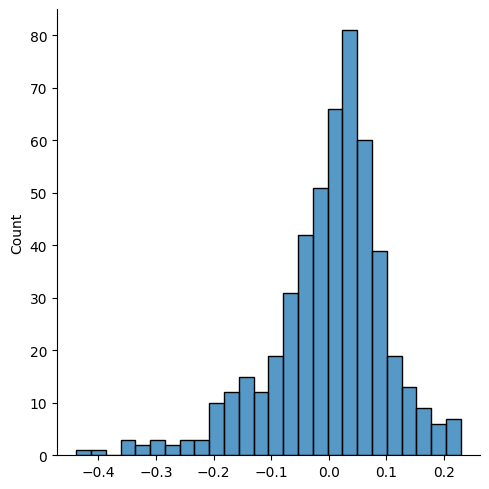

In [54]:
residual = y_train - y_train_pred
sns.displot(residual)

###  <span style="color:blue">Observation:</span>
1. From distribution plot, the mean of the plot lies on Zero and normally distributed
2. Residual are randomly distributed with no patterns
3. Scatter plot shows that the residual is Heteroscedasticity  that is the residual variance after different section on the plot are equal.

###  <span style="color:orange">Model trained above is Good & Better Fit</span>

##  <span style="color:red">Step5: Predictions and evaluation on the test set</span>

In [55]:
#The rescaling done on train set need to be performed on test set to get the identical 
# create a list of numeric vars
num_vars = ['temp','atemp','hum','windspeed','cnt']

# Fit on the data
bikeshare_test_lr[num_vars] = scaler.transform(bikeshare_test_lr[num_vars])
bikeshare_test_lr.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Clear,LightSnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,1,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,1,0,...,0,0,0,0,0,0,1,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,1,0,...,0,0,0,0,0,0,0,0,1,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,0,0,...,1,0,0,0,0,0,0,0,0,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,1,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
#Create depended and independent variable test sets
y_test = bikeshare_test_lr.pop('cnt')
X_test = bikeshare_test_lr

In [57]:
# add a constant
X_test = sm.add_constant(X_test)
X_test.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Clear,LightSnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
468,1.0,1,0,0,0.543115,0.536771,0.518248,0.422104,1,0,...,0,0,0,0,0,0,0,0,0,0
148,1.0,0,0,0,0.758058,0.704203,0.843709,0.479765,1,0,...,0,0,0,0,0,0,1,0,0,0
302,1.0,0,0,0,0.324018,0.317998,0.642765,0.386287,1,0,...,0,0,0,0,0,0,0,0,1,0
355,1.0,0,0,1,0.453814,0.455552,0.780592,0.062325,0,0,...,1,0,0,0,0,0,0,0,0,0
515,1.0,1,0,1,0.773634,0.724915,0.507943,0.433030,1,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
drop_columns = ['atemp','Aug','Dec','Feb','Jan','Jul','Oct','holiday','summer','Tue', 'Sat','Sun','Thu','Wed','Jun','Clear','LightSnow','Mist']
X_test_refined = X_test.drop(drop_columns,axis=1)
X_test_refined.shape

(220, 13)

In [59]:
y_test_pred = bikeshare_model.predict(X_test_refined)
y_test_pred.head()

468    0.660649
148    0.419334
302    0.337189
355    0.209324
515    0.824975
dtype: float64

In [60]:
#Evaluate R2
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.813007361599446

###  <span style="color:blue">Observation: </span>
- The R2 score for Test is 0.813, which is close to the R2 score for Train i.e 0.814
- Hence <b><span style="color:orange">Model trained is Better Fit</span></b>.

## <span style="color:red">Step6: Automated Approach (Recursive Feature Selection Elmination) - Model Selection</span>
Lets build the model using Automated approach and compare the R2, MSE and important variables 

In [61]:
bikeshare_train, bikeshare_test = train_test_split(bikesharing_5,train_size=0.7,random_state=42)
bikeshare_train_lr = bikeshare_train
bikeshare_test_lr = bikeshare_test

In [62]:
bikeshare_train_lr[num_vars] = scaler.fit_transform(bikeshare_train_lr[num_vars])
bikeshare_test_lr[num_vars] = scaler.transform(bikeshare_test_lr[num_vars])

In [63]:
lr = LinearRegression()
y_train_scaled = bikeshare_train_lr.pop('cnt')
X_train_scaled = bikeshare_train_lr

In [64]:
rfe = RFE(estimator=lr, n_features_to_select=13)  # Select top 3 features
rfe = rfe.fit(X_train_scaled, y_train_scaled)
#X_test_rfe = rfe.transform(X_train_scaled)

In [65]:
list(zip(X_train_scaled.columns, rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.False_, np.int64(5)),
 ('workingday', np.False_, np.int64(4)),
 ('temp', np.False_, np.int64(2)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('Clear', np.True_, np.int64(1)),
 ('LightSnow', np.True_, np.int64(1)),
 ('Mist', np.False_, np.int64(7)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.False_, np.int64(14)),
 ('winter', np.True_, np.int64(1)),
 ('Mon', np.False_, np.int64(3)),
 ('Sat', np.False_, np.int64(18)),
 ('Sun', np.False_, np.int64(15)),
 ('Thu', np.False_, np.int64(10)),
 ('Tue', np.False_, np.int64(12)),
 ('Wed', np.False_, np.int64(13)),
 ('Aug', np.False_, np.int64(9)),
 ('Dec', np.True_, np.int64(1)),
 ('Feb', np.False_, np.int64(11)),
 ('Jan', np.False_, np.int64(16)),
 ('Jul', np.True_, np.int64(1)),
 ('Jun', np.False_, np.int64(17)),
 ('Mar', np.True_, np.int64(1)),
 ('May', np.False_, np.int64(6)),
 ('Nov', np.True_, np.int64(1)),
 ('Oct', np.Fa

In [66]:
#RFE sections columns 
col = X_train_scaled.columns[rfe.support_]
col

Index(['yr', 'atemp', 'hum', 'windspeed', 'Clear', 'LightSnow', 'spring',
       'winter', 'Dec', 'Jul', 'Mar', 'Nov', 'Sep'],
      dtype='object')

In [67]:
X_train_rfe =  X_train_scaled[col]

In [68]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [69]:
lm=sm.OLS(y_train_scaled, X_train_rfe).fit()
y_train_pred = lm.predict(X_train_rfe)

In [70]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.66e-186
Time:                        11:08:01   Log-Likelihood:                 481.42
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     496   BIC:                            -875.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.041      6.671      0.000       0.194       0.357
yr             0.2366      0.009     27.519      0.000       0.220       0.254
atemp          0.4707      0.037     12.589      0.000       0.397       0.544
hum           -0.1680      0.040     -4.160      0.000      -0.247      -0.089
windspeed     -0.1112      0.025     -4.422      0.000      -0.161      -0.062
Clear          0.0573      0.011      5.110      0.000       0.035       0.079
LightSnow     -0.1591      0.027     -5.943      0.000      -0.212      -0.106
spring        -0.1586      0.017     -9.286      0.000      -0.192      -0.125
winter         0.0891      0.014      6.186      0.000       0.061       0.117
Dec           -0.0636      0.018     -3.489      0.001      -0.099      -0.028
Jul           -0.0593      0.017     -3.487      0.001      -0.093      -0.026
Mar            0.0498      0.018      2.722      0.007       0.014       0.086
Nov           -0.0847      0.019     -4.386      0.000      -0.123      -0.047
Sep            0.0561      0.016      3.573      0.000       0.025       0.087
==============================================================================
Omnibus:                       81.988   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.514
Skew:                          -0.878   Prob(JB):                     3.46e-38
Kurtosis:                       5.243   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Feature'] = X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
0,const,95.47
2,atemp,3.54
7,spring,2.90
8,winter,2.17
3,hum,1.88
12,Nov,1.71
5,Clear,1.65
10,Jul,1.35
9,Dec,1.28
4,windspeed,1.22


In [72]:
residual_rfe = y_train_scaled - y_train_pred
residual_rfe

645   -0.013101
163    0.062790
360    0.059592
640    0.089287
625   -0.184429
         ...   
71    -0.009865
106    0.001979
270   -0.125494
435    0.028089
102   -0.070142
Length: 510, dtype: float64

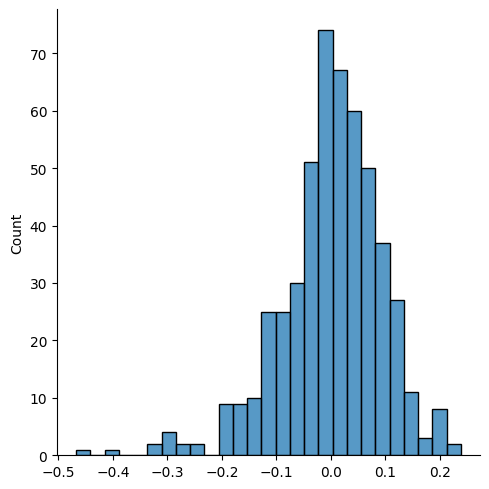

In [73]:
sns.displot(residual_rfe)
plt.show()

In [74]:
### Observation:
y_test_scaled = bikeshare_test_lr.pop('cnt')
X_test_scaled = bikeshare_test_lr

In [75]:
y_test_pred = rfe.predict(X_test_scaled)

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
# Model Evaluation
print("Selected Features:", X_train_scaled.columns[rfe.support_])  # Print Selected Features
print("R-Squared:", r2_score(y_true=y_test_scaled,y_pred=y_test_pred))
print("MSE:", mean_squared_error(y_test_scaled, y_test_pred))

Selected Features: Index(['yr', 'atemp', 'hum', 'windspeed', 'Clear', 'LightSnow', 'spring',
       'winter', 'Dec', 'Jul', 'Mar', 'Nov', 'Sep'],
      dtype='object')
R-Squared: 0.8239766140058763
MSE: 0.009489276541784202


##  <span style="color:red">Step7: Conclusion:</span>
1. The independent variable selection in manual linear regression are similar.
2. The R2-Square score in manual =0.813 and automated=0.824, very close
3. Mean Square error is close to zero, which indicated **<span style="color:green">BETTER MODEL FIT</span>**
4. Significant variable that can predict the demand for shared bikes are <b>'const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring','winter', 'Mon', 'Mar', 'May', 'Nov', 'Sep'</b>.
5. These variable can explain the bike demand with close to <b>0.813 acurracy</b>.